**Exercise 10 (Learning from Data):** Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows: $c_{1}$ is the first coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let $v_{1}, v_{rand}$ and $v_{min}$ be the fraction of heads you obtain for the respective three coins.
1. What is $\mu$ for the tree coins selected?

***Answer:*** By probability we know that $\mu = \frac{1}{2}$ for all three coins, since each coin flip was performed independently and the coin is fair.

2. Repeat this entire experiment a large number of times (e.g., 100000 runs of the entire experiment) to get several instances of $v_{1}, v_{rand}$ and $v_{min}$ and plot the histograms of the distributions of $v_{1}, v_{rand}$ and $v_{min}$. Notice that which coins end up being $c_{rand}$ and $c_{min}$ may differ from one run to another. 

***Answer:***

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Define p for the binomial distribution, # of coins, # of flips for each coin and # of runs for the experiment
p = 0.5
flips = 10
coins = 1000
trials = 100000

In [5]:
# Make the experiments: flip 1000 coins 10 times, 100000 times
experiments = np.random.binomial(flips, p, (coins, trials))

In [6]:
# Pick the first coin
v_1 = experiments[0, :]/flips

In [7]:
# Pick the coin with the lowest frequency of heads in each experiment
v_min = experiments.min(axis=0)/flips

In [8]:
# Pick a random coin in each experiment
v_rand = np.apply_along_axis(np.random.choice, 0, experiments)/flips

### Histogram plots

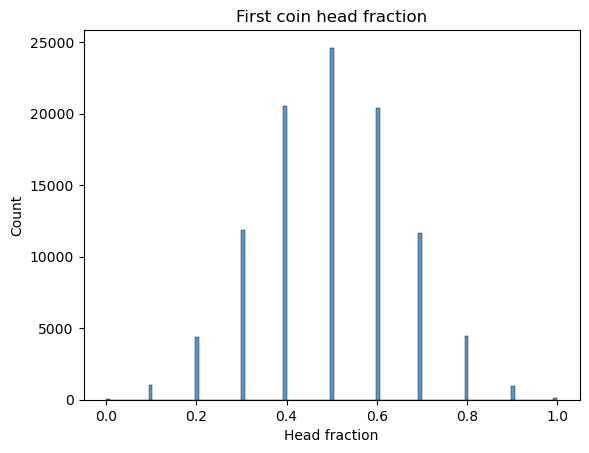

In [10]:
# First coin distribution
sns.histplot(v_1)
plt.title('First coin head fraction')
plt.xlabel('Head fraction')
plt.show()

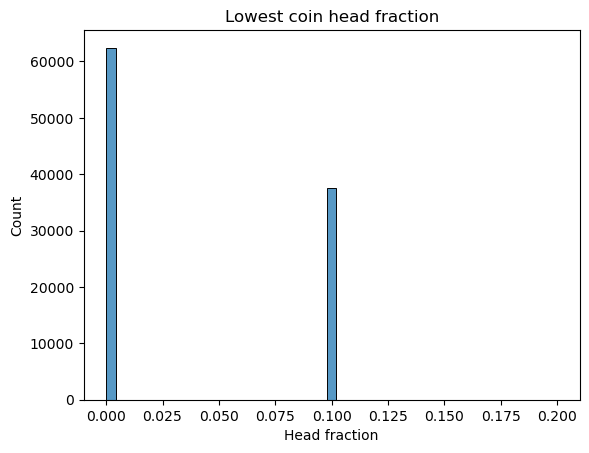

In [11]:
# Coin with lowest head fraction distribution
sns.histplot(v_min)
plt.title('Lowest coin head fraction')
plt.xlabel('Head fraction')
plt.show()

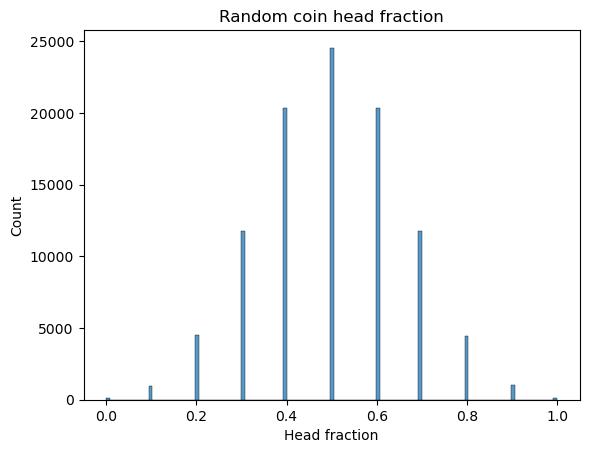

In [12]:
# Random coin distribution
sns.histplot(v_rand)
plt.title('Random coin head fraction')
plt.xlabel('Head fraction')
plt.show()

3. Using (2), plot estimates for $\mathbb{P}[|v-\mu|> \epsilon]$ as a function of $\epsilon$, together with the Hoeffding bound $2e^{-2\epsilon ^{2}N}$ (on the same graph).


***Answer:***

### Hoeffding's inequality

In [13]:
# Create a list for epsilon values from 0.1 to 1
epsilons = np.arange(0.1, 1.1, 0.1)

In [34]:
fractions_dict = {'c_1':[v_1, 'b', 'v_1'], 'c_min':[v_min, 'g', 'v_min'], 'c_rand':[v_rand, 'r', 'v_rand']}

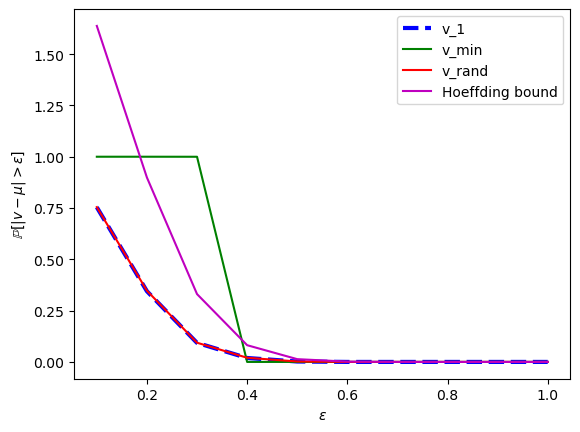

In [37]:
import math
fig, ax = plt.subplots()
i = 1
hoeff = []
for key in fractions_dict.keys():    
    pacum = []   
    fraction = fractions_dict[key][0]
    fraction_index = np.copy(fraction)
    fraction = fraction/np.sum(fraction)
    for epsilon in epsilons:        
        px_be_epsplus = np.sum(fraction[fraction_index>=(p+epsilon)])
        px_be_epsminus = np.sum(fraction[fraction_index<=(p-epsilon)])
        probDeviation = px_be_epsminus+px_be_epsplus        
        pacum.append(probDeviation)
        if i == 1:            
            hoeffBound = 2*math.exp(-2*flips*(epsilon**2))
            hoeff.append(hoeffBound)
    
    i +=1
    if fractions_dict[key][2] == 'v_1':
        ax.plot(epsilons, pacum, color=fractions_dict[key][1], label=fractions_dict[key][2], linewidth=3, linestyle= "--")
    else:     
        ax.plot(epsilons, pacum, color=fractions_dict[key][1], label=fractions_dict[key][2])

ax.plot(epsilons, hoeff, color='m', label='Hoeffding bound')
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel(r'$\mathbb{P}[|v-\mu|> \epsilon]$')
ax.legend()
plt.show()

4. Which coins obey the Hoeffding bound, and which ones do not? Explain why.

***Answer:*** The coins $c_{1}$ and $c_{rand}$  obey the Hoeffding bound, while the coin $c_{min}$ does not since the hypothesis picked up for this coin is not fixed before the coin is flipped and this is a necessary condition for the inequality to hold.

5. Relate part (4) to the multiple bins case.

***Answer:*** In the case of multiple bins, the hypothesis is not fixed before doing the experiment, this implies that the probability of occurrence of a certain event A will be affected by this fact. In the cases of the $c_{1}$ and $c_{rand}$, the hypotheses are fixed before the coin toss (we are seeing just one bin), unlike the coin $c_{min}$ where their choice depends on the outcome of the tosses, so Hoeffding's inequality would not apply (we are seeing multiple bins at a time).